## Excercises for Classification problems

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import torch
from torch import nn
torch.__version__

'2.6.0+cu124'

## 1. Make a binary classification dataset with Scikit-Learn's make_moons() function

In [2]:
# creating a toy dataset (make_moons())
from sklearn.datasets import make_moons

n_samples = 1000

X, y = make_moons(n_samples,
                  noise=0.02,
                  random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
# turning data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [4]:
y.type, X.type

(<function Tensor.type>, <function Tensor.type>)

In [5]:
# splitting the data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [6]:
# creating a table of the dataset using pandas

import pandas as pd

moons = pd.DataFrame({"X1": X[:, 0],
                      "X2": X[:, 1],
                      "label": y})

moons.head(10)

,X1,X2,label
0,-0.003312,0.383379,1.0
1,0.943511,-0.481472,1.0
2,0.925759,-0.449535,1.0
3,0.430470,-0.366058,1.0
4,-0.847017,0.527905,0.0
5,0.574662,-0.368780,1.0
6,0.296083,-0.210375,1.0
7,-0.008543,0.430013,1.0
8,1.629695,-0.278017,1.0
9,0.666163,0.776073,0.0


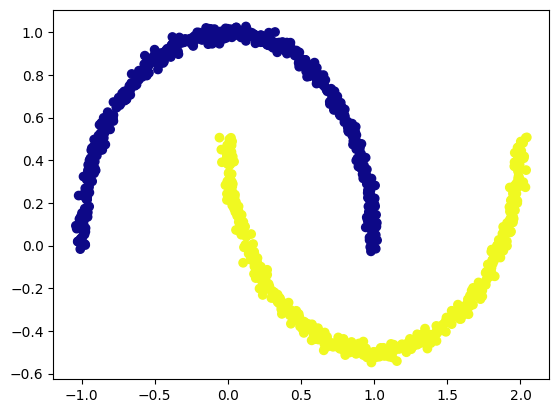

In [7]:
# visualizing the data using matplotlib


plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.plasma)
plt.show();

In [27]:
# building a model by subclassing nn.Module that incorporates non-linear activation fn

from torch import nn

class MoonModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=64)
    self.relu = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=64, out_features=64)
    self.relu = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=64, out_features=32)
    self.relu = nn.ReLU()
    self.layer_4 = nn.Linear(in_features=32, out_features=1)

  def forward(self, x):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))


model_0 = MoonModelV0()
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=32, bias=True)
  (layer_4): Linear(in_features=32, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6492, -0.1243],
                      [-0.5176, -0.3943],
                      [ 0.0790,  0.4701],
                      [ 0.3085,  0.2044],
                      [-0.6114, -0.1337],
                      [ 0.4438,  0.2876],
                      [-0.5085, -0.3151],
                      [ 0.6189,  0.2619],
                      [-0.2955, -0.3369],
                      [-0.4587,  0.0818],
                      [-0.2716, -0.0449],
                      [-0.3811, -0.5526],
                      [-0.4390, -0.1666],
                      [ 0.1806, -0.3050],
                      [-0.6564,  0.4888],
                      [-0.2461, -0.6267],
                      [ 0.1246,  0.0884],
                      [ 0.6399,  0.1852],
                      [ 0.2769, -0.1056],
                      [ 0.7025,  0.0371],
                      [ 0.6952, -0.3125],
                      [-0.5681, -0.4687],
                      [-0.2948, -0.1905],
  

In [10]:
# set up a binary classification compatitable loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

# creating an optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                         lr=0.1)


In [11]:
# creating an accuracy function

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred) * 100)
  return acc

In [12]:
# device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [13]:
X_train[:10], y_test[:10]

(tensor([[ 1.9662,  0.1979],
         [-0.9464,  0.3998],
         [-0.0919,  1.0144],
         [-0.1109,  0.9923],
         [ 0.3757, -0.2678],
         [-0.2271,  0.9593],
         [ 0.5278, -0.3628],
         [ 0.0918,  0.0996],
         [ 0.4558,  0.8965],
         [-0.9654,  0.2190]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [14]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: torch.Size([800, 2])
X_test: torch.Size([200, 2])
y_train: torch.Size([800])
y_test: torch.Size([200])


In [15]:
y_train = y_train.unsqueeze(1)  # Shape: [800, 1]
y_test = y_test.unsqueeze(1)    # Shape: [200, 1]

In [16]:
# checking the logits

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test)
y_logits[:5]


tensor([[ 0.0223],
        [-0.3793],
        [ 0.0410],
        [-0.4284],
        [-0.1736]])

In [17]:
y_pred_probs = torch.sigmoid(y_logits)

In [18]:
print(X_test.shape)

torch.Size([200, 2])


In [19]:
# activation function


y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5056],
        [0.4063],
        [0.5103],
        [0.3945],
        [0.4567]])

In [20]:
# Step 1: Get logits from model
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)

# Step 2: Convert logits to probabilities
y_pred_probs = torch.sigmoid(y_logits)

# Step 3: Convert probabilities to labels
y_pred_labels = torch.round(y_pred_probs)

print(y_pred_labels.squeeze()[:10])

tensor([1., 0., 1., 0., 0., 0., 0., 0., 1., 0.])


In [29]:
# Setup
loss_fn = nn.BCEWithLogitsLoss()  # or BCELoss() + sigmoid
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)
epochs = 1000

for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train)
    loss = loss_fn(y_logits, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate on test set
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test)
        test_loss = loss_fn(test_logits, y_test)

        # Accuracy (optional)
        test_pred_probs = torch.sigmoid(test_logits)
        test_preds = torch.round(test_pred_probs)
        acc = (test_preds == y_test).float().mean()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train loss: {loss.item():.4f}, Test loss: {test_loss.item():.4f}, Test acc: {acc:.4f}")

Epoch 0: Train loss: 0.6954, Test loss: 0.6628, Test acc: 0.7650
Epoch 100: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 200: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 300: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 400: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 500: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 600: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 700: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 800: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000
Epoch 900: Train loss: 0.0000, Test loss: 0.0000, Test acc: 1.0000


In [30]:
model_0.eval()
with torch.inference_mode():
  y_test_logits = model_0(X_test)
  y_test_probs = torch.sigmoid(y_test_logits)
  y_test_preds = torch.round(y_test_probs)

  test_acc = accuracy_fn(y_test, test_preds)
  print(f"Test accuracy: {test_acc:.2f}%")

Test accuracy: 100.00%


<ipython-input-33-f069c702e0ce>:20: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  plt.contourf(xx, yy, preds, cmap="coolwarm", edgecolors="k")


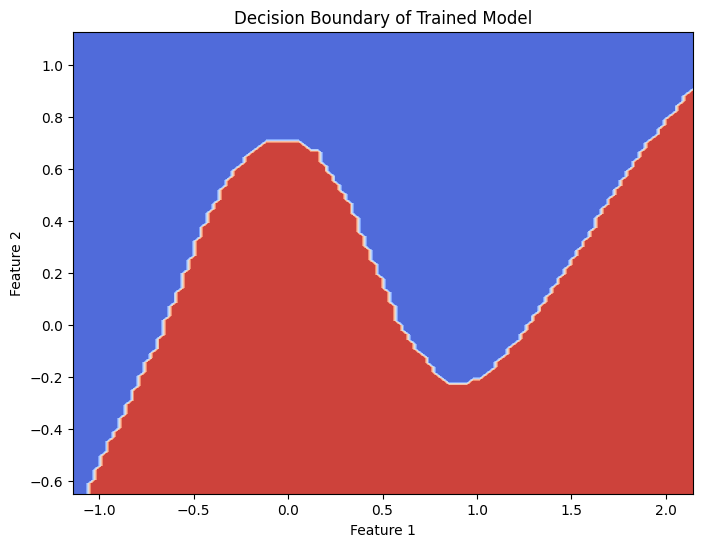

In [33]:
# visualize the model's performance

import numpy as np

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

model_0.eval()
with torch.inference_mode():
  logits = model_0(grid)
  probs = torch.sigmoid(logits)
  preds = torch.round(probs).reshape(xx.shape)

# plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, cmap="coolwarm", edgecolors="k")
plt.title("Decision Boundary of Trained Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show();